In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.09 		 0.05 |
| 1000 		 0.45 		 0.28 |
| 1000 		 0.59 		 0.1 |
| 1000 		 0.13 		 0.35 |
| 1000 		 0.01 		 0.33 |
| 1000 		 0.01 		 0.1 |
| 1000 		 0.22 		 0.05 |
| 1000 		 0.2 		 0.15 |
| 1000 		 0.01 		 0.27 |
| 1000 		 0.16 		 0.3 |
| 1000 		 0.16 		 0.19 |
| 1000 		 0.26 		 0.35 |
| 1000 		 0.03 		 0.07 |
| 1000 		 0.12 		 0.17 |
| 1000 		 0.24 		 0.19 |
| 1000 		 0.3 		 0.31 |
| 1000 		 0.16 		 0.16 |
| 1000 		 0.07 		 0.43 |
| 1000 		 0.24 		 0.0 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.15
The s.d. of I is: 0.16
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.22
The mean of I is: 0.2
-------------------------------------


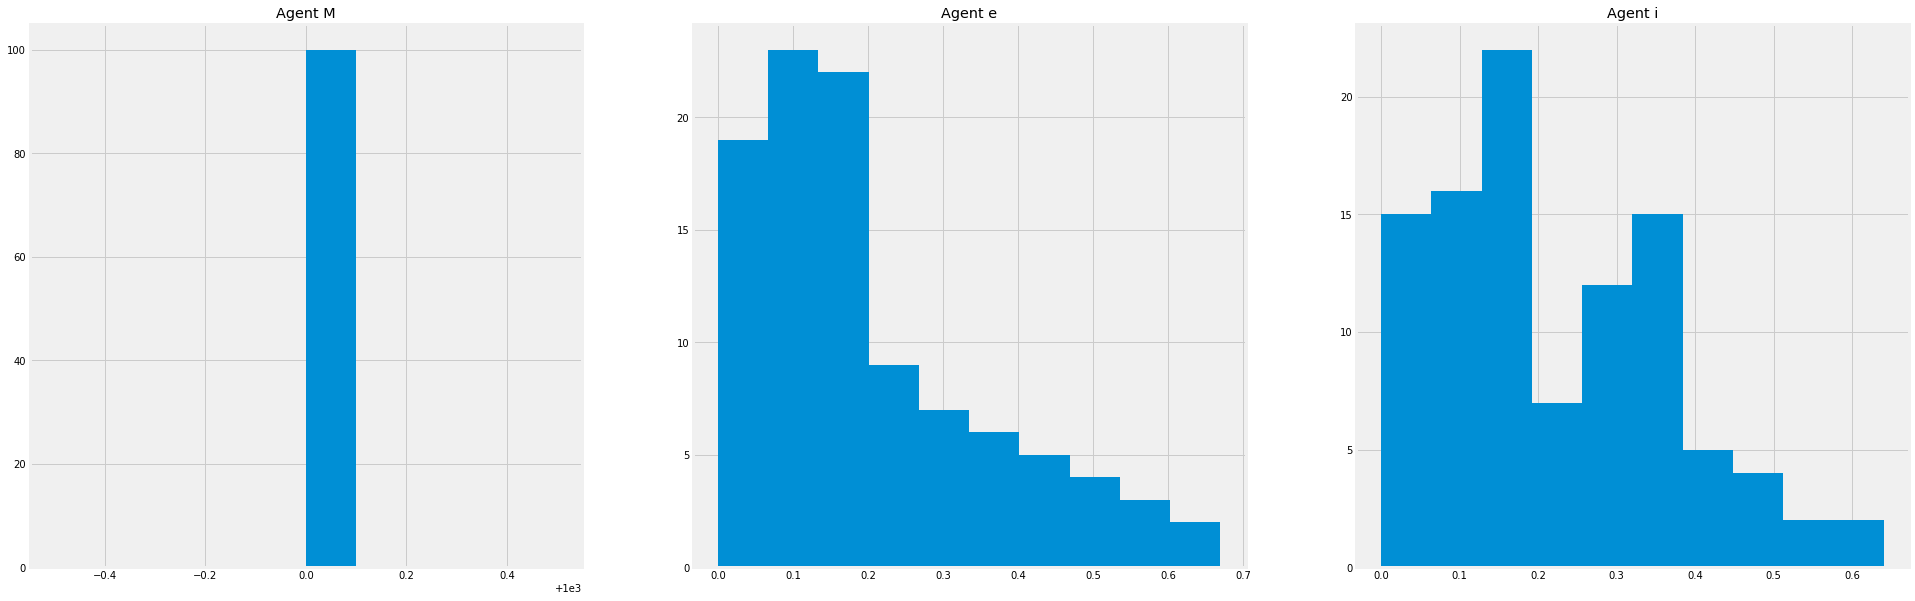

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 67.0, Temptation: 90.0, Sucker: -23.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 425.0, Temptation: 450.0, Sucker: -25.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 60.0, Temptation: 90.0, Sucker: -30.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 581.0, Temptation: 590.0, Sucker: -9.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 83.0, Temptation: 90.0, Sucker: -7.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 98.0, Temptation: 130.0, Sucke

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 33 minutes.
    S.D.  Counts  Seed
0    0.5     194  1024
1    0.6     191  1024
2    0.7     201  1024
3    0.8     173  1024
4    0.9     177  1024
5    1.0     152  1024
6    1.1     150  1024
7    1.2     116  1024
8    1.3     109  1024
9    1.4     104  1024
10   1.5      96  1024
11   1.6      78  1024
12   1.7      72  1024
13   1.8      40  1024
14   1.9      23  1024
15   2.0      11  1024
16   2.1      12  1024
17   2.2       9  1024
18   2.3       5  1024
19   2.4       5  1024
20   2.5       3  1024
21   2.6       1  1024
22   2.7       0  1024
23   2.8       0  1024
24   2.9       0  1024
25   3.0       0  1024


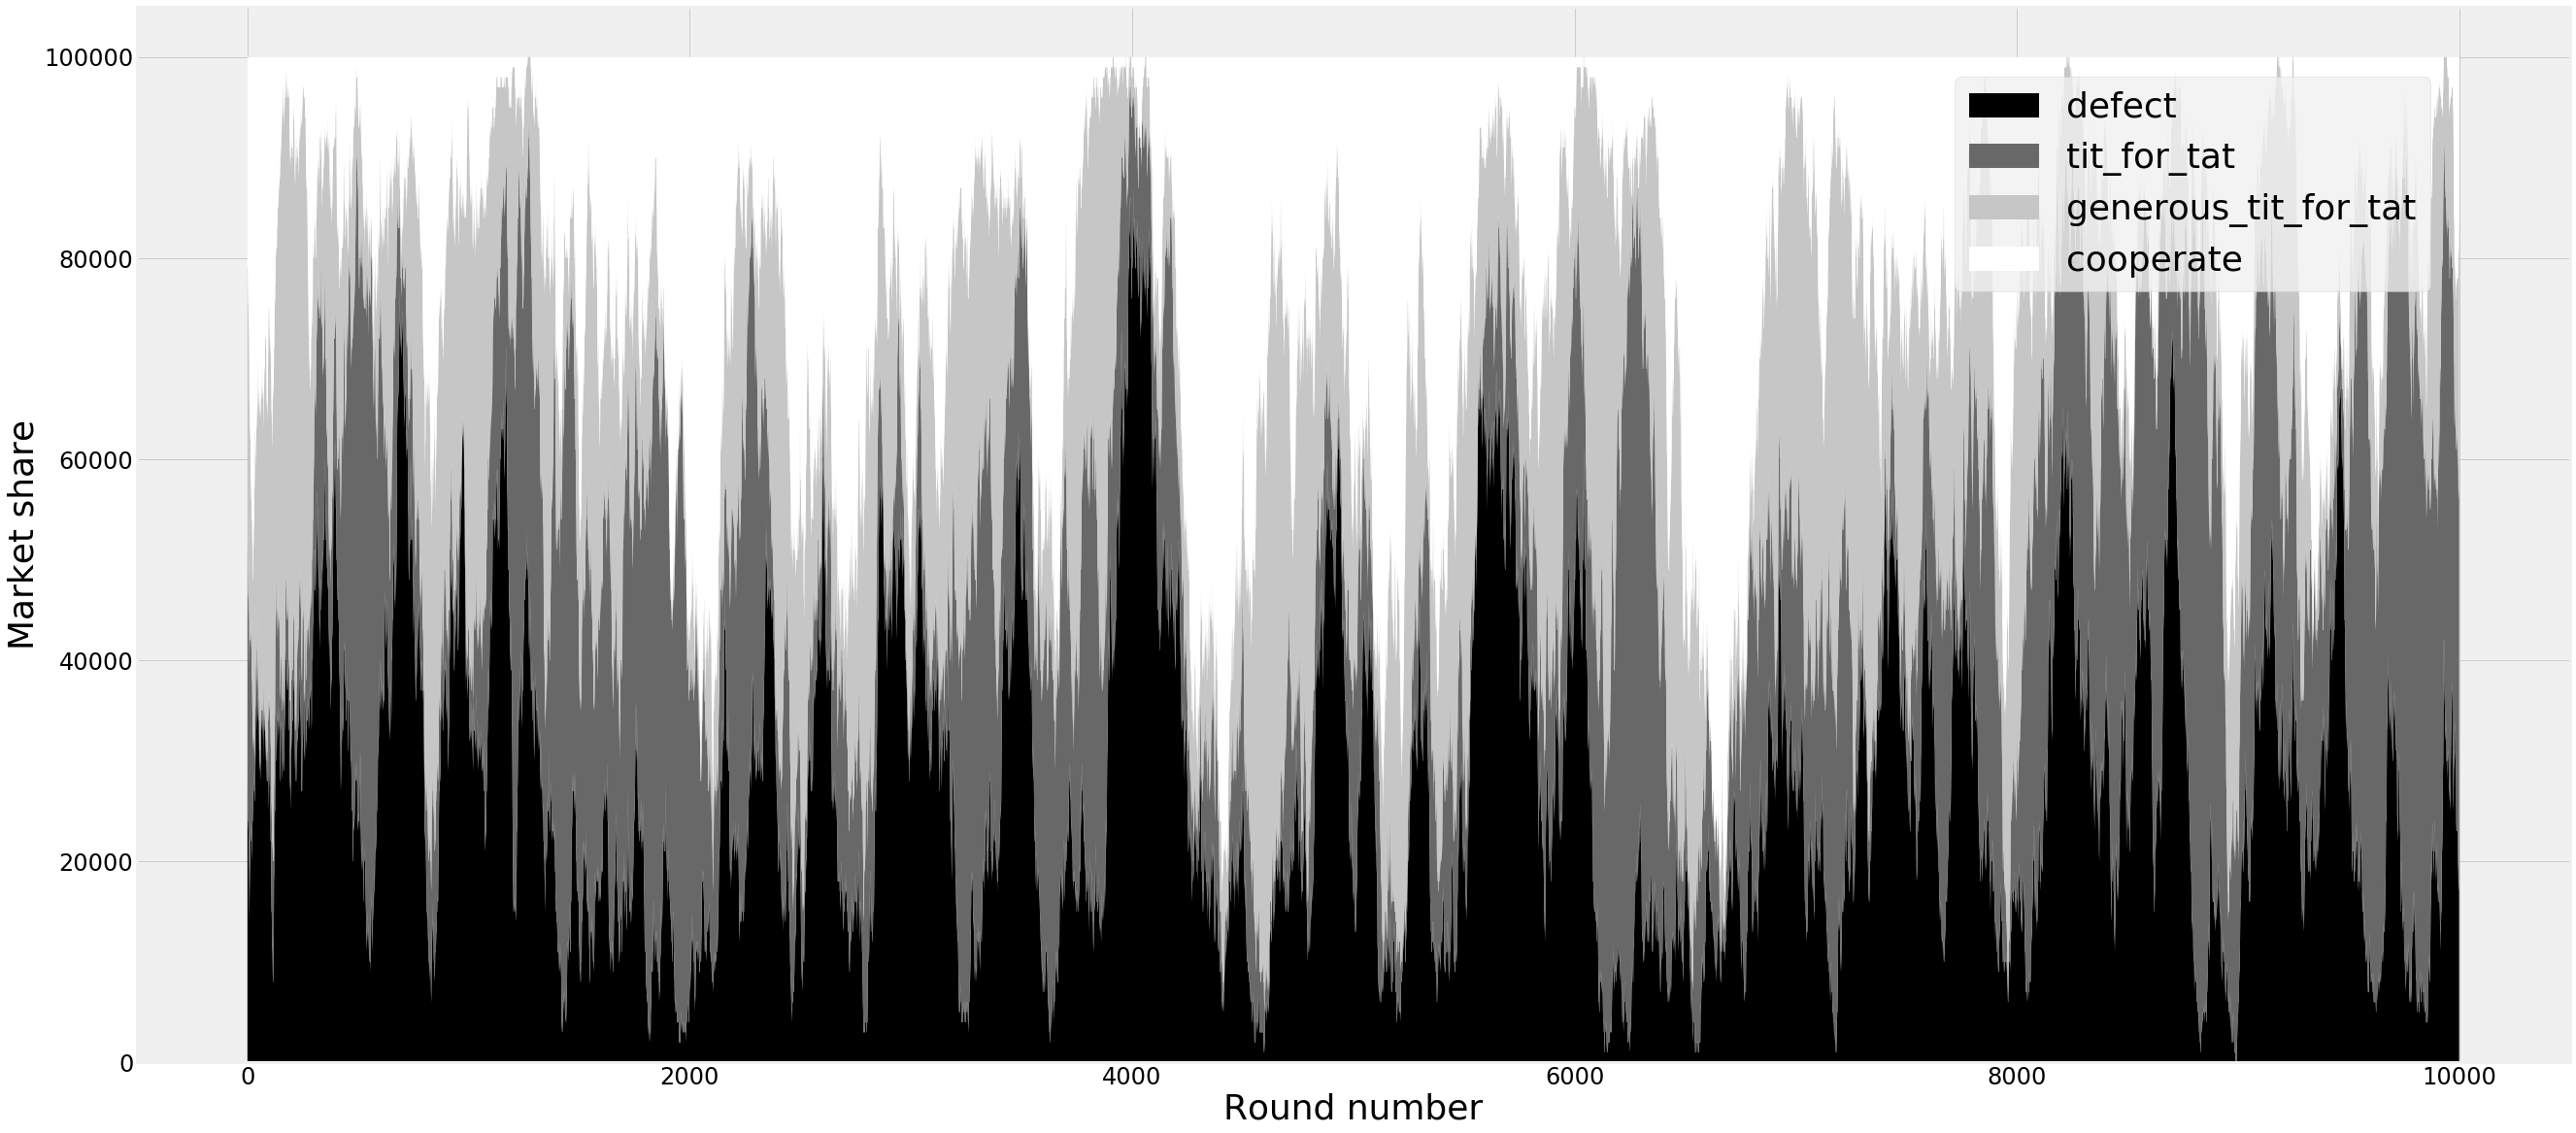

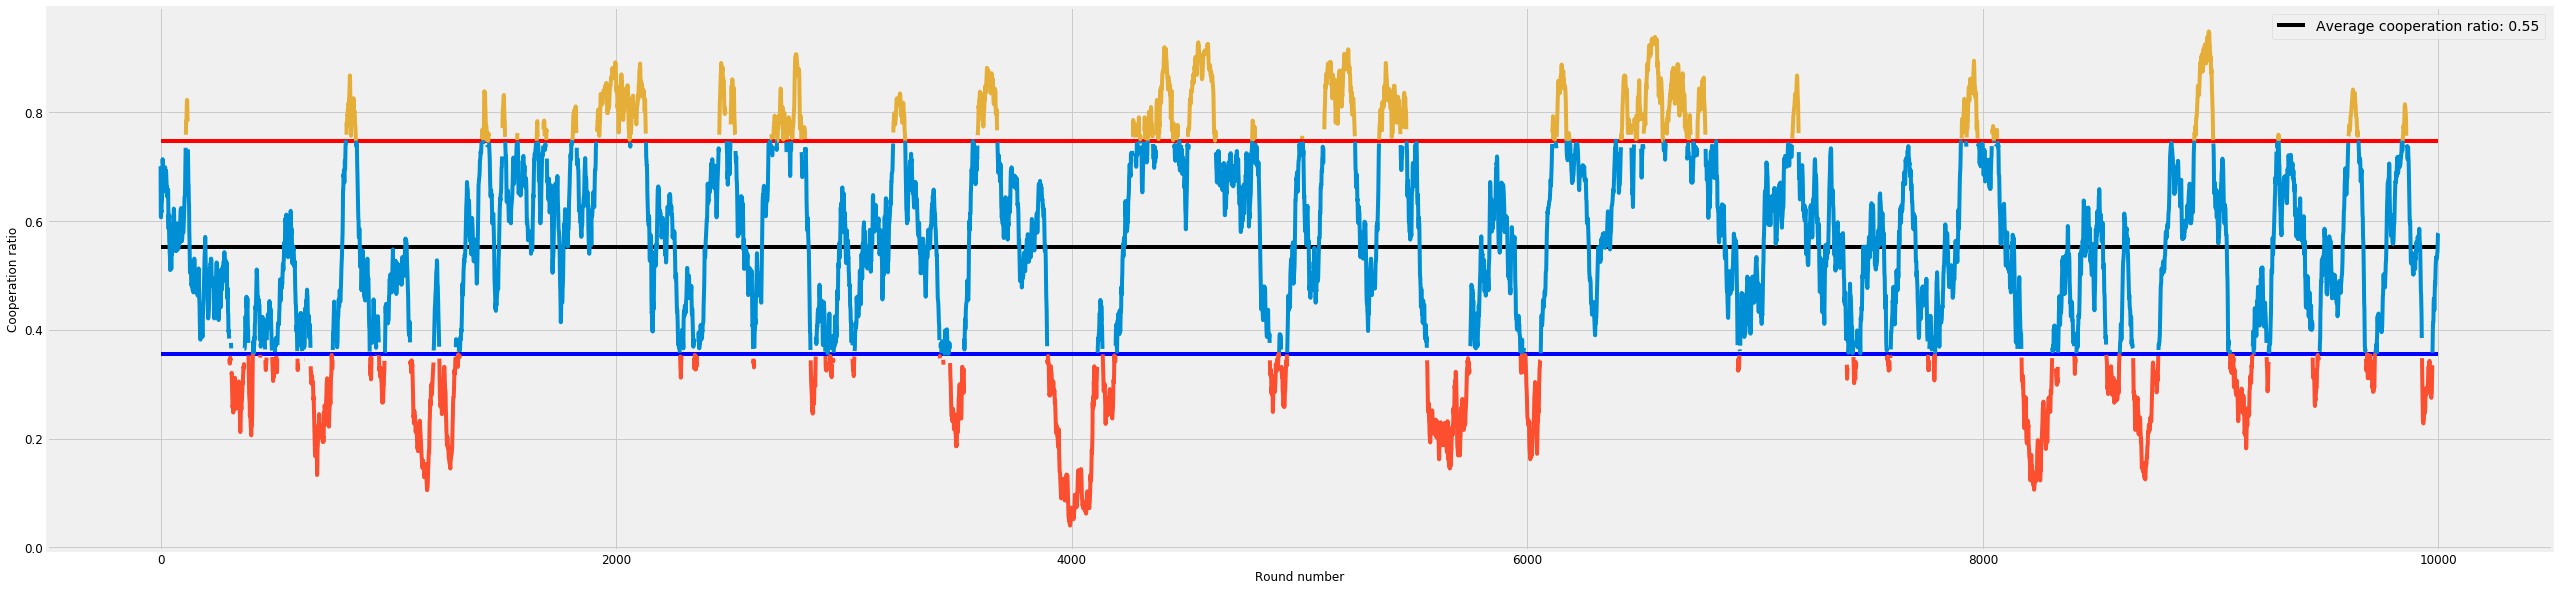

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdei", seed = str(seed))